# Определение перспективного тарифа для телеком-компании

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Изучение данных из файла 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
calls = pd.read_csv('C:/Users/Nick/yandex_project_4/calls.csv')

In [3]:
# Создаю функцию демонстрации информации
def info(df):
    df.info()
    display(df.head())

In [4]:
info(calls)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [5]:
internet = pd.read_csv('C:/Users/Nick/yandex_project_4/internet.csv', index_col=[0])

In [6]:
info(internet)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [7]:
messages = pd.read_csv('C:/Users/Nick/yandex_project_4/messages.csv')

In [8]:
info(messages)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [9]:
tariffs = pd.read_csv('C:/Users/Nick/yandex_project_4/tariffs.csv')

In [10]:
info(tariffs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [11]:
users = pd.read_csv('C:/Users/Nick/yandex_project_4/users.csv')

In [12]:
info(users)
users.query('~(churn_date.isna())').head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
19,1019,63,2018-10-05,Томск,Игнатий,Круглов,2018-05-16,ultra
20,1020,59,2018-12-18,Чита,Тала,Костина,2018-10-22,smart
34,1034,66,2018-11-21,Вологда,Святослав,Бондарев,2018-08-26,smart
50,1050,44,2018-10-03,Тюмень,Рузана,Аничкина,2018-06-16,ultra
51,1051,37,2018-10-14,Москва,Кристина,Сомова,2018-05-28,smart


### Вывод

В calls можно изменить тип данных столбца *call_date*, на datetime64, чтобы иметь возможность работать с ним, как с датами. Пропусков нет. 

В internet можно удалить дублирующий индексы столбец *Unnamed: 0*. Можно изменить тип данных столбца *session_date*, на datetime64, чтобы иметь возможность работать с ним, как с датами. Пропусков нет.

В messages можно изменить тип данных столбца *message_date*, на datetime64, чтобы иметь возможность работать с ним, как с датами. Пропусков нет. 

В tarrifs все в порядке на первый взгляд. 

В users можно изменить тип данных столбца *reg_date*, на datetime64, чтобы иметь возможность работать с ним, как с датами. Пропуски только в столбце *churn_date*. Эти пропуски, как сказано и в описании, означают, что на момент выгрузки данных тариф еще действовал. Не критично.

Необходимо проверить данные на аномалии и дубликаты.

## Предобработка данных

### Изменение типов данных

In [13]:
# Функция изменения данных
def df_to_datetime(df, col_date):
    df[col_date] = pd.to_datetime(df[col_date], format='%Y-%m-%d')
    df['user_id'] = df['user_id'].astype('str')
    return df.info()
df_to_datetime(calls, 'call_date')
df_to_datetime(internet, 'session_date')
df_to_datetime(messages, 'message_date')
df_to_datetime(users, 'churn_date')
df_to_datetime(users, 'reg_date')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 6.2+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 5.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeI

In [14]:
calls['duration'] = np.ceil(calls['duration'])
calls['duration'] = calls['duration'].astype('int16')
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


Преобразование в datetime прошло успешно. Изменять Int64 на int16 не вижу смысла. Ничего не выиграем. *User_id* вроде логично преоброзовать в строку, можно будет использовать duplicated(), например. 

Также в столбце *duration* таблицы *calls* округлил секунды вверх до минут по ТЗ и изменил тип данных на int16.


### Аномалии и дубликаты

In [15]:
calls['duration'].describe()

count    202607.000000
mean          7.158198
std           5.959173
min           0.000000
25%           2.000000
50%           6.000000
75%          11.000000
max          38.000000
Name: duration, dtype: float64

In [16]:
# Функция поиска дубликатов
def duplicate(df):
    print(df.query('id.str.contains("_")')['id'].count()) # Смотрю, не пропало ли нижнее подчеркивание
    print(df['id'].duplicated().sum())
print(calls['user_id'].value_counts().head(15))
duplicate(calls)

1377    1760
1168    1692
1375    1560
1453    1440
1196    1240
1021    1224
1363    1200
1282    1188
1458    1155
1381    1092
1341    1092
1057    1080
1360    1060
1356    1026
1344    1008
Name: user_id, dtype: int64
202607
0


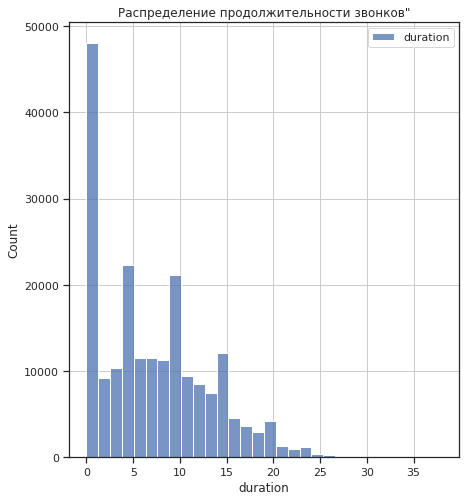

In [17]:
sns.set(rc={'figure.figsize':(7,8)})
sns.set_style("ticks",{'axes.grid' : True})
ax = sns.histplot(data=calls, x='duration', bins=30, legend=True)
plt.legend(labels=['duration'])
ax.set_title(r'Распределение продолжительности звонков"');

Минимальное значение продолжительности звонка ноль - это пропущенный вызов, не аномалия. Среднее намного ниже медианы, данные перекошены, рассмотрим перекос позже. Явных дубликатов не найдено. Неявных  тоже, нижнее подчеркивание никуда не потерялось и не превратилось ни в тире, ни в дефис.

In [18]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [19]:
internet.query('mb_used == 0').head()

,id,mb_used,session_date,user_id
11,1000_11,0.0,2018-08-28,1000
38,1000_38,0.0,2018-11-27,1000
46,1000_46,0.0,2018-06-30,1000
67,1000_67,0.0,2018-06-16,1000
72,1000_72,0.0,2018-06-15,1000


In [20]:
internet.query('mb_used == 0')['mb_used'].count()

19598

In [21]:
duplicate(internet)

149396
0


Минимальная сессия 0 встречается 19598 раз, видимо 0 проставляется, когда человек не выходил вообще в интеренет, либо буквально на один байтик заглянул и разрядность в данных (2 знака после запятой) не позволили поймать такие сессии. Это не критично в любом случае, пусть будет ноль.

Я удалил столбец *Unnamed: 0*, так как он дублировал индекс.

Максимальное значение мегабайт выглядит правдоподобно.

Явных и неявных дубликатов не нашел.

Можно проверить количество сессий в день и разбить по категориям мегабайты.

Перевел мегабайты в гигабайты, добавил столбец *gb_used* и округлил вверх по ТЗ.

In [22]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 2.8+ MB


In [23]:
duplicate(messages)

123036
0


Дубликатов не обнаружил.

In [24]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [25]:
users['user_id'].duplicated().sum()

0

In [26]:
users['last_name'].duplicated().sum()

81

In [27]:
# Смотрю дупликаты по нескольким столбцам
users[users.duplicated(['last_name', 'first_name'])]['last_name'].count()

0

In [28]:
users.describe()

,age
count,500.00000
mean,46.58800
std,16.66763
min,18.00000
25%,32.00000
50%,46.00000
75%,62.00000
max,75.00000


In [29]:
print(users['city'].value_counts().count())
display(users.query('~(city.str.istitle())').head(10)) # смотрю, все ли города начинаются с большой буквы, или есть лишнее
users['city'].value_counts().head(40)

76


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
53,1053,64,NaT,Ростов-на-Дону,Ренальд,Фёдоров,2018-09-30,ultra
220,1220,59,NaT,Ростов-на-Дону,Рубен,Астапов,2018-11-22,smart
238,1238,57,NaT,Ростов-на-Дону,Радислав,Наумов,2018-01-08,smart
252,1252,49,NaT,Ростов-на-Дону,Лейла,Ерофеева,2018-12-02,smart
365,1365,38,NaT,Ростов-на-Дону,Георгий,Вишняков,2018-10-31,smart
380,1380,45,NaT,Ростов-на-Дону,Доминика,Карасева,2018-05-07,ultra


Москва              99
Санкт-Петербург     39
Новосибирск         16
Омск                14
Казань              14
Уфа                 12
Екатеринбург        11
Набережные Челны    11
Краснодар           11
Ульяновск           11
Самара               9
Челябинск            9
Волгоград            8
Пермь                8
Нижний Новгород      8
Новокузнецк          7
Улан-Удэ             7
Вологда              7
Красноярск           7
Воронеж              6
Иркутск              6
Пенза                6
Тюмень               6
Ростов-на-Дону       6
Сочи                 6
Киров                6
Томск                6
Балашиха             5
Магнитогорск         5
Махачкала            5
Ставрополь           5
Владивосток          5
Новороссийск         4
Кострома             4
Тольятти             4
Мурманск             4
Астрахань            4
Петрозаводск         4
Саранск              4
Хабаровск            4
Name: city, dtype: int64

In [30]:
users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

Я проверял, не присвоился ли новый user_id дублирующимся строкам. Нет дупликатов одновременно по имени и фамилии, значит, не присвоился. 

В столбце *age* аномалий не обнаружил.

В столбце *city* ошибок и аномалий нет. В нем действительно все города, все строки начинаются с заглавной буквы, ложное срабатывание вызвал только Ростов-на-Дону. 76 городов, деревень нет, неявных дубликатов тоже. 

Пропуски пока не буду заменять, сделаю категоризацию.

### Категоризация и добавление столбцов

#### Звонки

In [31]:
# Добавляю отдельно столбцы с днями и месяцами
calls['day'] = calls['call_date'].dt.weekday 
calls['month'] = calls['call_date'].dt.month
calls.head()

,id,call_date,duration,user_id,day,month
0,1000_0,2018-07-25,0,1000,2,7
1,1000_1,2018-08-17,0,1000,4,8
2,1000_2,2018-06-11,3,1000,0,6
3,1000_3,2018-09-21,14,1000,4,9
4,1000_4,2018-12-15,6,1000,5,12


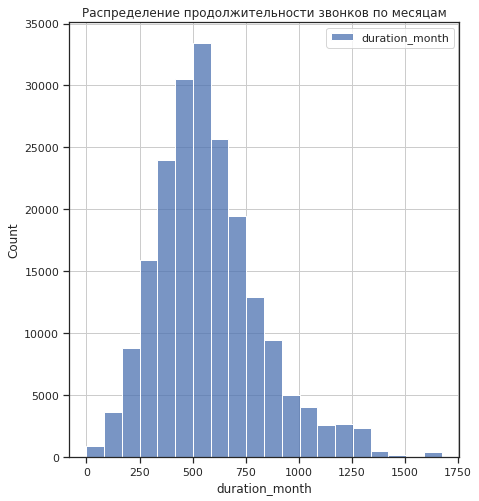

In [32]:
calls['calls_count_month'] = calls.groupby(['user_id', 'month'])['user_id'].transform('count')
calls['duration_month'] = calls.groupby(['user_id', 'month'])['duration'].transform('sum')


ax = sns.histplot(data=calls, x='duration_month', bins=20)
plt.legend(labels=['duration_month'])
ax.set_title('Распределение продолжительности звонков по месяцам');

In [33]:
calls_month = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum'])
calls_month.columns = ['calls_count', 'duration']
calls_month.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3174 entries, ('1000', 5) to ('1499', 12)
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   calls_count  3174 non-null   int64
 1   duration     3174 non-null   int16
dtypes: int16(1), int64(1)
memory usage: 44.3+ KB


Добавил столбцы дня недели и месяца. Добавил столбцы с посчитанными количеством звонков и минут по каждому клиенту. Создал переменную, в которой хранится сводная таблица с количеством звонков и суммой минут по каждому пользователю в месяц.

#### Интернет

In [34]:
# Перевожу мегабайты в гигабайты
internet['gb_used'] = internet['mb_used'] / 1024
# Добавляю отдельно столбцы с днями и месяцами
internet['day'] = internet['session_date'].dt.weekday 
internet['month'] = internet['session_date'].dt.month

In [35]:
internet['gb_month'] = internet.groupby(['user_id', 'month'])['gb_used'].transform('sum').apply(np.ceil)
internet.head()

,id,mb_used,session_date,user_id,gb_used,day,month,gb_month
0,1000_0,112.95,2018-11-25,1000,0.110303,6,11,15.0
1,1000_1,1052.81,2018-09-07,1000,1.028135,4,9,15.0
2,1000_2,1197.26,2018-06-25,1000,1.169199,0,6,23.0
3,1000_3,550.27,2018-08-22,1000,0.537373,2,8,14.0
4,1000_4,302.56,2018-09-24,1000,0.295469,0,9,15.0


In [36]:
gb_month = internet.pivot_table(index=['user_id', 'month'], values='gb_used', aggfunc=['sum'])
gb_month.columns = ['gb_month']
gb_month['gb_month'] = gb_month['gb_month'].apply(np.ceil)

Добавил столбцы дня недели и месяца. Добавил столбцы с суммой гигабайт по каждому клиенту. Создал переменную, в которой хранится сводная таблица с суммой гигабайт по каждому пользователю в месяц. Гигабайты округлил вверх по документации.

#### Сообщения

In [37]:
# Добавляю отдельно столбцы с днями и месяцами
messages['day'] = messages['message_date'].dt.weekday 
messages['month'] = messages['message_date'].dt.month

In [38]:
messages['mess_count'] = messages.groupby(['user_id', 'month'])['user_id'].transform('count')
messages.head()

,id,message_date,user_id,day,month,mess_count
0,1000_0,2018-06-27,1000,2,6,60
1,1000_1,2018-10-08,1000,0,10,73
2,1000_2,2018-08-04,1000,5,8,81
3,1000_3,2018-06-16,1000,5,6,60
4,1000_4,2018-12-05,1000,2,12,70


In [39]:
mess_month = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc=['count'])
mess_month.columns = ['mess_month']
mess_month.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2717 entries, ('1000', 5) to ('1499', 12)
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   mess_month  2717 non-null   int64
dtypes: int64(1)
memory usage: 32.7+ KB


Добавил столбцы дня недели и месяца. Добавил столбцы с количеством сообщений по каждому клиенту. Создал переменную, в которой хранится сводная таблица с количеством сообщений по каждому пользователю в месяц.

#### Помесячная выручка

##### Склеиваю таблицы

In [40]:
# склеиваю сводные таблицы по месяцам и пользователям в общую таблицу month_revenue 
month_revenue = calls_month.merge(gb_month, on=['user_id', 'month'], how='outer')
month_revenue = month_revenue.merge(mess_month, on=['user_id', 'month'], how='outer').reset_index()
month_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      3214 non-null   object 
 1   month        3214 non-null   int64  
 2   calls_count  3174 non-null   float64
 3   duration     3174 non-null   float64
 4   gb_month     3203 non-null   float64
 5   mess_month   2717 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 150.8+ KB


In [41]:
# Добавляю тариф в таблицу
month_revenue = pd.merge(month_revenue, users[['user_id', 'tariff']], on='user_id', how='inner')
# Проверяю
month_revenue.info()
month_revenue.tail(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      3214 non-null   object 
 1   month        3214 non-null   int64  
 2   calls_count  3174 non-null   float64
 3   duration     3174 non-null   float64
 4   gb_month     3203 non-null   float64
 5   mess_month   2717 non-null   float64
 6   tariff       3214 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 200.9+ KB


,user_id,month,calls_count,duration,gb_month,mess_month,tariff
3204,1473,8,NaN,NaN,13.0,17.0,ultra
3205,1473,9,NaN,NaN,17.0,19.0,ultra
3206,1473,10,NaN,NaN,14.0,20.0,ultra
3207,1473,11,NaN,NaN,22.0,14.0,ultra
3208,1473,12,NaN,NaN,18.0,20.0,ultra
3209,1489,8,NaN,NaN,11.0,17.0,smart
3210,1489,9,NaN,NaN,17.0,32.0,smart
3211,1489,10,NaN,NaN,20.0,21.0,smart
3212,1489,11,NaN,NaN,18.0,20.0,smart
3213,1489,12,NaN,NaN,17.0,35.0,smart


Из-за пропусков в столбцах: *duration, gb_month, mess_month* в итоговом столбце с выручкой доля пропусков 17%.

##### Избавляюсь от пропусков

In [42]:
month_revenue.isna().sum()

user_id          0
month            0
calls_count     40
duration        40
gb_month        11
mess_month     497
tariff           0
dtype: int64

In [43]:
month_revenue.query('gb_month.isna() and duration.isna() and mess_month.isna()')['user_id'].count()

0

Одновременно во всех необходимых столбцах пропусков нет. 

Я предположу, что если клиент не использовал минуты, сообщения или гигабайты, то ему ставился пропуск. Соответсвенно я заменю пропуски на нули. Нули в столбцах с сообщениями, могут быть связаны с тем, что сообщение было не доставлено, нули в столбце гигабайт также могут быть связаны с ненадежным соединением с интернетом. Плюс подсказка с пропущенными звонками)))

In [44]:
month_revenue.fillna(0, inplace=True)

In [45]:
temp= month_revenue.pivot_table(index='user_id', values='gb_month')
temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 498 entries, 1000 to 1499
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gb_month  498 non-null    float64
dtypes: float64(1)
memory usage: 7.8+ KB


Всего 498 клиентов осталось, потеряли двух, у которых про пуски были во всех трех столбцах, не критично.

In [46]:
month_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      3214 non-null   object 
 1   month        3214 non-null   int64  
 2   calls_count  3214 non-null   float64
 3   duration     3214 non-null   float64
 4   gb_month     3214 non-null   float64
 5   mess_month   3214 non-null   float64
 6   tariff       3214 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 200.9+ KB


##### Добавляю столбцы, промежуточные расчеты

In [47]:
tariffs['gb_per_month_included'] = tariffs['mb_per_month_included'] / 1024

In [48]:
tariffs = tariffs.rename(columns={'tariff_name': 'tariff'})
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff,gb_per_month_included
0,50,15360,500,550,200,3,3,smart,15.0
1,1000,30720,3000,1950,150,1,1,ultra,30.0


In [49]:
month_revenue.head()

,user_id,month,calls_count,duration,gb_month,mess_month,tariff
0,1000,5,22.0,159.0,3.0,22.0,ultra
1,1000,6,43.0,172.0,23.0,60.0,ultra
2,1000,7,47.0,340.0,14.0,75.0,ultra
3,1000,8,52.0,408.0,14.0,81.0,ultra
4,1000,9,58.0,466.0,15.0,57.0,ultra


In [51]:
def calc_revenue(row):
    tariff = row['tariff']
    # получаем строку нужного тарифа
    tariff_conditions_row = tariffs.query('tariff == @tariff')

    # используем  .values[0], чтобы получить значение из ячейки
    calls_pay = (
        max(row['duration'] - tariff_conditions_row['minutes_included'].values[0], 0)
        * tariff_conditions_row['rub_per_minute'].values[0]
    )
    gb_pay = (
        max(row['gb_month'] - tariff_conditions_row['gb_per_month_included'].values[0], 0)
        * tariff_conditions_row['rub_per_gb'].values[0]
    )
    mess_pay = (
        max(row['mess_month'] - tariff_conditions_row['messages_included'].values[0], 0)
        * tariff_conditions_row['rub_per_message'].values[0]
    )
 

    return calls_pay + gb_pay + mess_pay + tariff_conditions_row['rub_monthly_fee'].values[0]


month_revenue['revenue'] = month_revenue.apply(calc_revenue, axis=1)


In [51]:
# добавляю функцию расчета доли переплат по тарифам смарт и ультра
def calc_share(row):
    tariff = row['tariff']
    tariff_conditions_row = tariffs.query('tariff == @tariff')
    return ((row['revenue'] - tariff_conditions_row['rub_monthly_fee'].values[0]) / tariff_conditions_row['rub_monthly_fee'].values[0]).round(decimals=2)

month_revenue['share_overpay'] = month_revenue.apply(calc_share, axis=1)

In [52]:
month_revenue.head(10)

,user_id,month,calls_count,duration,gb_month,mess_month,tariff,revenue,share_overpay
0,1000,5,22.0,159.0,3.0,22.0,ultra,1950.0,0.00
1,1000,6,43.0,172.0,23.0,60.0,ultra,1950.0,0.00
2,1000,7,47.0,340.0,14.0,75.0,ultra,1950.0,0.00
3,1000,8,52.0,408.0,14.0,81.0,ultra,1950.0,0.00
4,1000,9,58.0,466.0,15.0,57.0,ultra,1950.0,0.00
5,1000,10,57.0,350.0,15.0,73.0,ultra,1950.0,0.00
6,1000,11,43.0,338.0,15.0,58.0,ultra,1950.0,0.00
7,1000,12,46.0,333.0,10.0,70.0,ultra,1950.0,0.00
8,1001,11,59.0,430.0,18.0,0.0,smart,1150.0,1.09
9,1001,12,63.0,414.0,14.0,0.0,smart,550.0,0.00


In [53]:
# проверяю
month_revenue.info()
month_revenue.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        3214 non-null   object 
 1   month          3214 non-null   int64  
 2   calls_count    3214 non-null   float64
 3   duration       3214 non-null   float64
 4   gb_month       3214 non-null   float64
 5   mess_month     3214 non-null   float64
 6   tariff         3214 non-null   object 
 7   revenue        3214 non-null   float64
 8   share_overpay  3214 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 251.1+ KB


,user_id,month,calls_count,duration,gb_month,mess_month,tariff,revenue,share_overpay
0,1000,5,22.0,159.0,3.0,22.0,ultra,1950.0,0.0
1,1000,6,43.0,172.0,23.0,60.0,ultra,1950.0,0.0
2,1000,7,47.0,340.0,14.0,75.0,ultra,1950.0,0.0
3,1000,8,52.0,408.0,14.0,81.0,ultra,1950.0,0.0
4,1000,9,58.0,466.0,15.0,57.0,ultra,1950.0,0.0


## Исследовательский анализ данных

### Первичный просмотр на превышение по траффику, минутам и сообщениям

In [54]:
# дополнительные сообщения тариф Смарт
print('Дополнительные сообщения тариф Смарт:', 
      month_revenue.query('mess_month > 50 and tariff == "smart"')['tariff'].count())
# дополнительные сообщения тариф Ультра
print('Дополнительные сообщения тариф Ультра:', 
      month_revenue.query('mess_month > 1000  and tariff == "ultra"')['tariff'].count())
# дополнительные минуты тариф Смарт
print('Дополнительные минуты тариф Смарт:', 
      month_revenue.query('duration > 500  and tariff == "smart"')['tariff'].count())
# дополнительные минуты тариф Ультра
print('Дополнительные минуты тариф Ультра:',
      month_revenue.query('duration > 3000  and tariff == "ultra"')['tariff'].count())
# дополнительный траффик тариф Смарт
print('Дополнительный траффик тариф Смарт:',
      month_revenue.query('gb_month > 15 and tariff == "smart"')['tariff'].count())
# дополнительный траффик тариф Ультра
print('Дополнительный траффик тариф Ультра:',
      month_revenue.query('gb_month > 30 and tariff == "ultra"')['tariff'].count())
print('Количество Тарифов Ультра:',
      month_revenue.query('tariff == "ultra"')['tariff'].count())
print('Количество Тарифов Смарт:',
      month_revenue.query('tariff == "smart"')['tariff'].count())

Дополнительные сообщения тариф Смарт: 564
Дополнительные сообщения тариф Ультра: 0
Дополнительные минуты тариф Смарт: 754
Дополнительные минуты тариф Ультра: 0
Дополнительный траффик тариф Смарт: 1304
Дополнительный траффик тариф Ультра: 134
Количество Тарифов Ультра: 985
Количество Тарифов Смарт: 2229


Количество превышений в тарифе Смарт:

* 564 сообщения, 25.3% 
* 754 минуты, 34,2%
* 1304 по объему траффика, 58.5%

Количество превышений в тарифе Ультра:

* 134 по объему траффика, 13.6%

В тарифе ультра превышений по минутам и сообщениям нет, есть превышения по гигабайтам, в тарифе смарт есть превышения по всем рассматриваемым критерям. Учитывая это, добавлю новые столбцы с долями дохода, гигабайтов, минут и сообщений по тарифам.

In [55]:
# добавляю долю превышения по гигабайтам по тарифам смарт и ультра
month_revenue['gb_over'] = month_revenue['gb_month']
month_revenue['gb_over'] = np.where((month_revenue['tariff'] == 'smart') &
                                    (month_revenue['gb_month'] <= 15),
                                    0, month_revenue['gb_over'])
month_revenue['gb_over'] = np.where((month_revenue['tariff'] == 'smart') &
                                    (month_revenue['gb_month'] > 15),
                                    (month_revenue['gb_month'] - 15) / 15,
                                    month_revenue['gb_over'])

month_revenue['gb_over'] = np.where((month_revenue['tariff'] == 'ultra') &
                                    (month_revenue['gb_month'] <= 30),
                                    0, month_revenue['gb_over'])
month_revenue['gb_over'] = np.where((month_revenue['tariff'] == 'ultra') &
                                    (month_revenue['gb_month'] > 30),
                                    (month_revenue['gb_month'] - 30) / 30,
                                    month_revenue['gb_over'])

month_revenue['gb_over'] = month_revenue['gb_over'].round(decimals=2)
# добавляю долю превышения по смскам по тарифам смарт и ультра
month_revenue['mess_over'] = month_revenue['mess_month']

month_revenue['mess_over'] = np.where((month_revenue['tariff'] == 'smart') &
                                    (month_revenue['mess_month'] <= 50),
                                    0, month_revenue['mess_over'])
month_revenue['mess_over'] = np.where((month_revenue['tariff'] == 'smart') &
                                    (month_revenue['mess_month'] > 50),
                                    (month_revenue['mess_month'] - 50) / 50,
                                    month_revenue['mess_over'])

month_revenue['mess_over'] = np.where((month_revenue['tariff'] == 'ultra') &
                                    (month_revenue['mess_month'] <= 1000),
                                    0, month_revenue['mess_over'])
# добавляю долю превышения по минутам по тарифам смарт и ультра
month_revenue['duration_over'] = month_revenue['duration']

month_revenue['duration_over'] = np.where((month_revenue['tariff'] == 'smart') &
                                    (month_revenue['duration'] <= 500),
                                    0, month_revenue['duration_over'])
month_revenue['duration_over'] = np.where((month_revenue['tariff'] == 'smart') &
                                    (month_revenue['duration'] > 500),
                                    (month_revenue['duration'] - 500) / 500,
                                    month_revenue['duration_over'])

month_revenue['duration_over'] = np.where((month_revenue['tariff'] == 'ultra') &
                                    (month_revenue['duration'] <= 3000),
                                    0, month_revenue['duration_over'])

In [56]:
display(month_revenue.head(10))
month_revenue.describe()

,user_id,month,calls_count,duration,gb_month,mess_month,tariff,revenue,share_overpay,gb_over,mess_over,duration_over
0,1000,5,22.0,159.0,3.0,22.0,ultra,1950.0,0.00,0.0,0.0,0.0
1,1000,6,43.0,172.0,23.0,60.0,ultra,1950.0,0.00,0.0,0.0,0.0
2,1000,7,47.0,340.0,14.0,75.0,ultra,1950.0,0.00,0.0,0.0,0.0
3,1000,8,52.0,408.0,14.0,81.0,ultra,1950.0,0.00,0.0,0.0,0.0
4,1000,9,58.0,466.0,15.0,57.0,ultra,1950.0,0.00,0.0,0.0,0.0
5,1000,10,57.0,350.0,15.0,73.0,ultra,1950.0,0.00,0.0,0.0,0.0
6,1000,11,43.0,338.0,15.0,58.0,ultra,1950.0,0.00,0.0,0.0,0.0
7,1000,12,46.0,333.0,10.0,70.0,ultra,1950.0,0.00,0.0,0.0,0.0
8,1001,11,59.0,430.0,18.0,0.0,smart,1150.0,1.09,0.2,0.0,0.0
9,1001,12,63.0,414.0,14.0,0.0,smart,550.0,0.00,0.0,0.0,0.0


,month,calls_count,duration,gb_month,mess_month,revenue,share_overpay,gb_over,mess_over,duration_over
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,8.317362,63.038892,451.244866,17.299004,38.281269,1529.076229,0.951923,0.146456,0.080448,0.057709
std,2.905413,33.236368,241.909978,7.400584,36.148326,798.251091,1.377453,0.224254,0.230178,0.146154
min,1.000000,0.000000,0.000000,0.000000,0.000000,550.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,40.000000,282.000000,13.000000,9.000000,750.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,62.000000,443.000000,17.000000,30.000000,1653.500000,0.230000,0.000000,0.000000,0.000000
75%,11.000000,82.000000,589.000000,21.000000,57.000000,1950.000000,1.480000,0.270000,0.000000,0.000000
max,12.000000,244.000000,1673.000000,49.000000,224.000000,6770.000000,11.310000,1.530000,1.860000,1.870000


In [57]:
display(month_revenue.query('calls_count == 244').head())
month_revenue.query('revenue == 6770').head()

,user_id,month,calls_count,duration,gb_month,mess_month,tariff,revenue,share_overpay,gb_over,mess_over,duration_over
2973,1467,12,244.0,1673.0,10.0,39.0,ultra,1950.0,0.0,0.0,0.0,0.0


,user_id,month,calls_count,duration,gb_month,mess_month,tariff,revenue,share_overpay,gb_over,mess_over,duration_over
3108,1486,12,133.0,1007.0,38.0,83.0,smart,6770.0,11.31,1.53,0.66,1.014


Максимальные и минимальные значения не выглядят подозрительно. Впрочем, лучше анализировать относительно тарифов.

### Анализ данных по тарифам

In [58]:
# Создаю отдельные переменные для тарифов Смарт и Ультра 
smart_month = month_revenue.query('tariff == "smart"')
ultra_month = month_revenue.query('tariff == "ultra"')

In [59]:
display(smart_month.describe())
ultra_month.describe()

,month,calls_count,duration,gb_month,mess_month,revenue,share_overpay,gb_over,mess_over,duration_over
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,8.346792,58.463437,417.934948,16.328847,33.384029,1289.973531,1.345384,0.199381,0.115998,0.083211
std,2.920316,25.939858,190.313730,5.747061,28.227876,818.404367,1.488096,0.245559,0.268849,0.169357
min,1.000000,0.000000,0.000000,0.000000,0.000000,550.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,40.000000,282.000000,13.000000,10.000000,550.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,60.000000,422.000000,17.000000,28.000000,1023.000000,0.860000,0.130000,0.000000,0.000000
75%,11.000000,76.000000,545.000000,20.000000,51.000000,1750.000000,2.180000,0.330000,0.020000,0.090000
max,12.000000,198.000000,1435.000000,38.000000,143.000000,6770.000000,11.310000,1.530000,1.860000,1.870000


,month,calls_count,duration,gb_month,mess_month,revenue,share_overpay,gb_over,mess_over,duration_over
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.00000,985.0,985.0
mean,8.250761,73.392893,526.623350,19.494416,49.363452,2070.152284,0.061543,0.02669,0.0,0.0
std,2.871762,43.916853,317.606098,9.853511,47.804457,376.187114,0.192768,0.08351,0.0,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,0.000000,0.00000,0.0,0.0
25%,6.000000,41.000000,284.000000,12.000000,6.000000,1950.000000,0.000000,0.00000,0.0,0.0
50%,9.000000,74.000000,518.000000,19.000000,38.000000,1950.000000,0.000000,0.00000,0.0,0.0
75%,11.000000,104.000000,752.000000,27.000000,79.000000,1950.000000,0.000000,0.00000,0.0,0.0
max,12.000000,244.000000,1673.000000,49.000000,224.000000,4800.000000,1.460000,0.63000,0.0,0.0


**Тариф Смарт:**

* В тарифе Смарт максимальная выручка превышает максимальную выручку тарифа Ультра. 
* Стандартное отклонение в признаках: *duration, gb_month, mess_month, revenue* большое. 
* Среднее не сильно отличается от медианы. 
* Среднее количество гигабайт превышает базовое значение тарифа: 16,3 гб. (17 гб. медиана) против 15 гб.

**Тариф Ультра:**

* Средняя выручка больше, чем в тарифе Смарт.
* Между 25 процинтелей и 75 нулевой разброс (1950 рублей). У выручки маленькое стандартное отклонение в целом - 16%. Значит, немного дополнительных минут, сообщений и траффика
* Незначительный разрыв между 75 процинтелей и максимальным значением по всем признакам, то же и для 25 процинтели.


In [60]:
print(smart_month['tariff'].count())
print(ultra_month['tariff'].count())
month_revenue['tariff'].count()

2229
985


3214

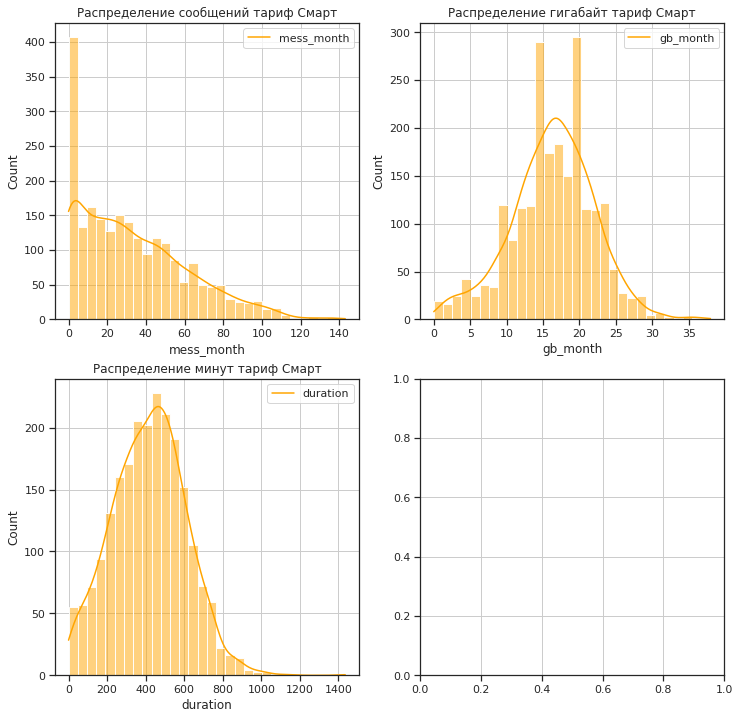

In [61]:
fig, axs = plt.subplots(2, 2, figsize=(12,12))
for col, y in {'duration' : [axs[1,0], 'Распределение минут тариф Cмарт'],
               'gb_month' : [axs[0,1], 'Распределение гигабайт тариф Cмарт'],
               'mess_month' : [axs[0,0], 'Распределение сообщений тариф Cмарт']}.items():
    sns.histplot(data=smart_month, x=col, kde=True, bins=30, color='orange',ax=y[0])
    y[0].legend(labels=[col])
    y[0].set_title(y[1])

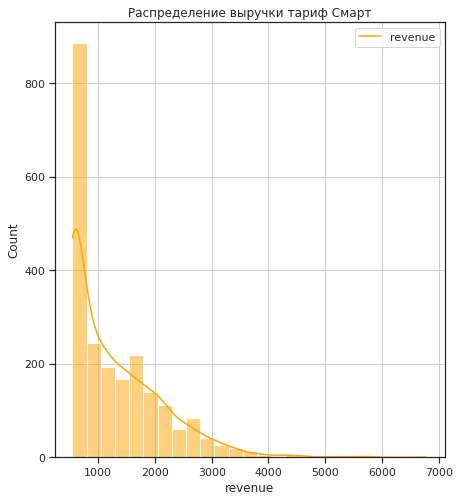

In [62]:
ax = sns.histplot(data=smart_month, x='revenue', kde=True, bins=30, binwidth=250, color='orange');
ax.legend(labels=['revenue'])
ax.set_title('Распределение выручки тариф Смарт');

In [63]:
filter_smart = smart_month.query('revenue < 4000')

In [64]:
smart_month.shape

(2229, 12)

In [65]:
filter_smart.shape

(2211, 12)

Отрезали хвост, потеряли меньше одного процента. Приемлемо.

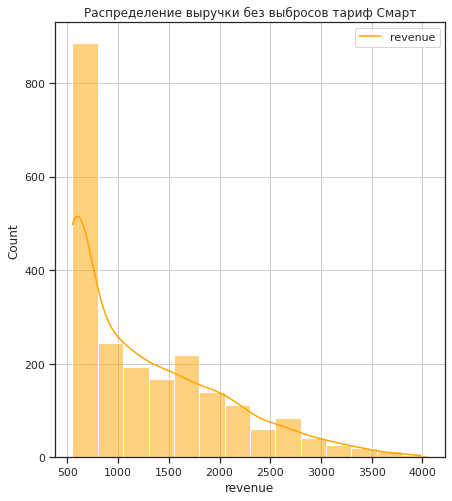

In [66]:
ax0 = sns.histplot(data=filter_smart, x='revenue', kde=True, bins=30, binwidth=250, color='orange');
ax0.legend(labels=['revenue'])
ax0.set_title(r'Распределение выручки без выбросов тариф Смарт');

Я взял гистограммы, так как минуты, гигабайты в Мегалайне неделимые, то есть дискретные. В тарифе Смарт сообщения распределены по нисподающей, распределение скошено вправо. Большинство пользователей в диапазоне до 50 сообщений, после 50 количество пользователей падает.

Траффик распределен практически нормально имеет центр приблизительно в 17 гб, но также имеет два больших пика на 15 и 20 гб, и два небольших на 10 гб и в диапазоне 24-25 гб. Людям очень тесно в рамках тарифа.

Минуты распределены нормально. Имеют небольшой правый хвост.

В гистограмме дохода большинство значений в отметке 550 рублей, однако есть хвост, случаев переплаты достаточно много, соразмерно случаем, когда пользователи укладываются в рамки тарифа.

Выборка по клиентам тарифа Смарт относительно общей - 69,4% (2229 строк).

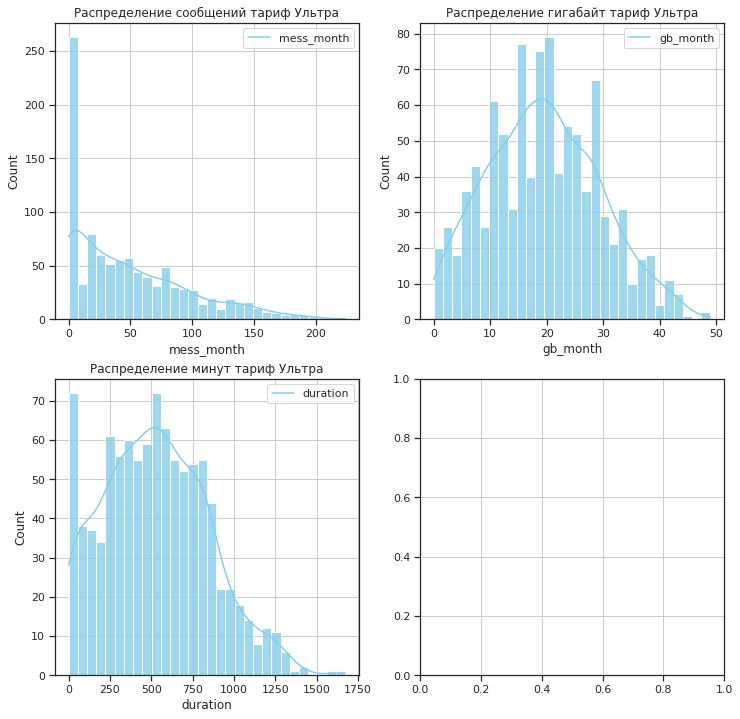

In [67]:
fig, axs = plt.subplots(2, 2, figsize=(12,12))
for col, y in {'duration' : [axs[1,0], 'Распределение минут тариф Ультра'],
               'gb_month' : [axs[0,1], 'Распределение гигабайт тариф Ультра'],
               'mess_month' : [axs[0,0], 'Распределение сообщений тариф Ультра']}.items():
    sns.histplot(data=ultra_month, x=col, kde=True, bins=30, color='skyblue',ax=y[0], alpha=0.8)
    y[0].legend(labels=[col])
    y[0].set_title(y[1])

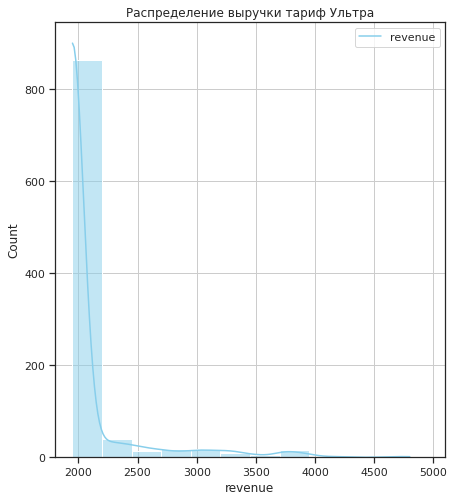

In [68]:
ax0 = sns.histplot(data=ultra_month, x='revenue', kde=True, bins=30, binwidth=250, color='skyblue')
ax0.legend(labels=['revenue'])
ax0.set_title(r'Распределение выручки тариф Ультра');

In [69]:
filter_ultra = ultra_month.query('revenue < 4000 or revenue.isna()')

In [70]:
ultra_month.shape

(985, 12)

In [71]:
filter_ultra.shape

(981, 12)

Потери так же незначительные после отсечки данных, как и в тарифе Смарт.

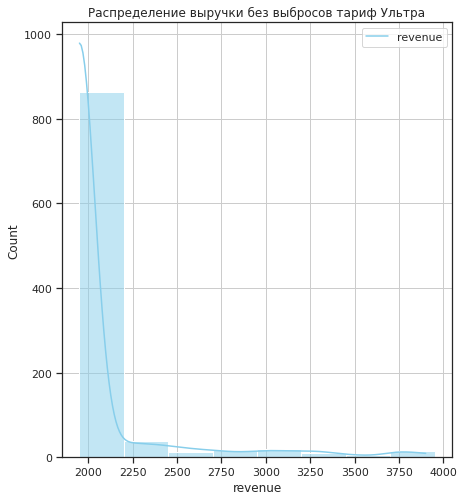

In [72]:
ax2 = sns.histplot(data=filter_ultra, x='revenue', kde=True, bins=30, binwidth=250, color='skyblue');
ax2.legend(labels=['revenue'])
ax2.set_title(r'Распределение выручки без выбросов тариф Ультра');

В тарифе Ультра гистограмма сообщений имеет схожий характер с гистограммой тарифа Смарт.

Распределение траффика имеет много пиков, но не один не превышает медианного. Наверное, это говорит о том, что поведение клиентов тарифа Ультра более индивидуально. 
В продолжительности разговора распределение не такое четкое, как у клиентов тарифа Смарт, но нет практически хвоста. 

По графику дохода видно, что почти все клиенты тарифа ультра укладываются в рамки тарифа и не переплачивают. Большинство переплачивающих в промежутке 2000 - 2500. Не так много относительно ежемесячного платежа.

Выборка по клиентам тарифа Ультра относительно общей - 30,6% (985 строк).

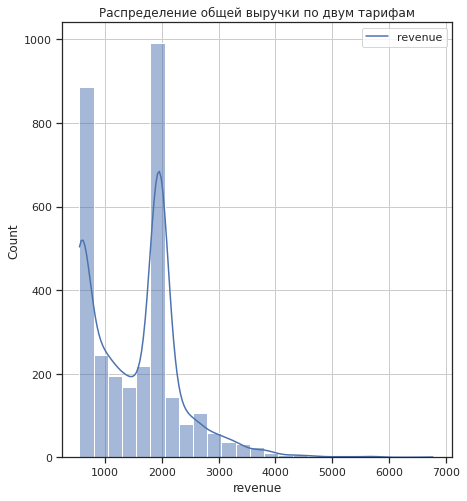

In [73]:
ax1 = sns.histplot(data=month_revenue, x='revenue', kde=True, bins=30, binwidth=250)
ax1.legend(labels=['revenue'])
ax1.set_title(r'Распределение общей выручки по двум тарифам');

Мы видим два четких пика в 550 и 1950 значения, ежемесячные платы за тарифы, логично. 

### Доли дополнительных минут, сообщений и траффика

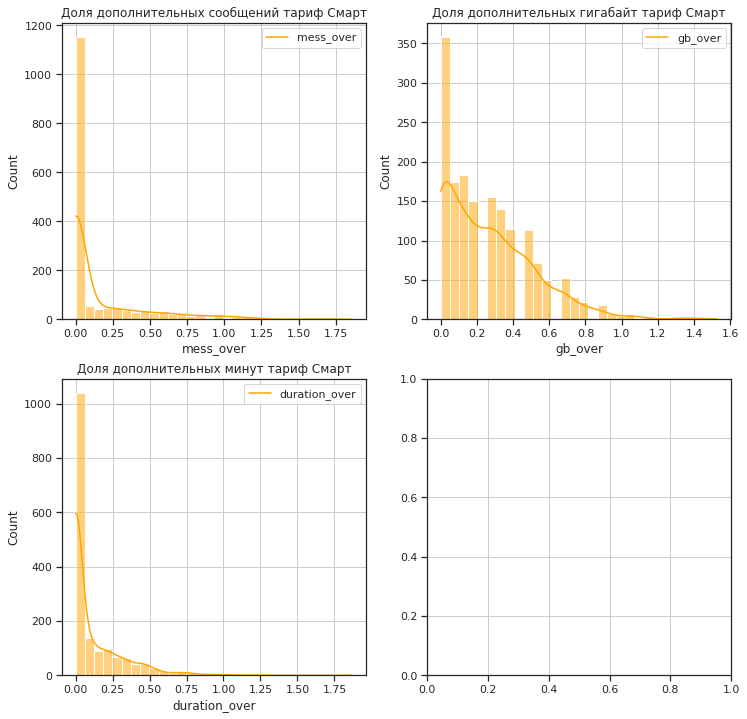

In [74]:
fig, axs = plt.subplots(2, 2, figsize=(12,12))
for col, y in {'duration_over' : [axs[1,0], 'Доля дополнительных минут тариф Cмарт'],
               'gb_over' : [axs[0,1], 'Доля дополнительных гигабайт тариф Cмарт'],
               'mess_over' : [axs[0,0], 'Доля дополнительных сообщений тариф Cмарт']}.items():
    sns.histplot(data=smart_month.query('revenue > 550'), x=col, kde=True, bins=30, color='orange',ax=y[0])
    y[0].legend(labels=[col])
    y[0].set_title(y[1])

,share_overpay
count,350.000000
mean,1.407941
std,1.101932
min,0.000000
25%,0.577375
50%,1.141250
75%,2.032500
max,6.880000


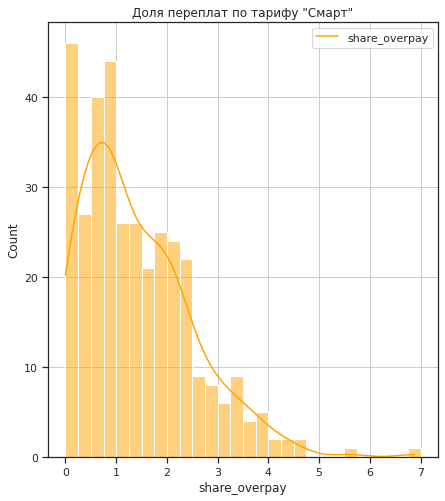

In [75]:
smart_revenue = smart_month.pivot_table(index='user_id', values='share_overpay')
ax3 = sns.histplot(data=smart_revenue, x='share_overpay', kde=True, bins=30, binwidth=0.25, color='orange')
ax3.legend(labels=['share_overpay'])
ax3.set_title(r'Доля переплат по тарифу "Смарт"');
smart_revenue.describe()

Доля выручки по медиане в тарифе Смарт составляет 1.16 по отношению к ежемесячной плате, а по среднему 1.43. Клиенты платят сверху 550 рублей еще 116%.

На гистограммах продолжительности разговора и количестве сообщений основная часть дополнительных минут и сообщений находится в промежутке до 10%.

Больше всего клиенты тарифа Смарт докупают гигабайты. Всего 325 случаев ограничиваются 5% сверх тарифа. Большая часть свыше 20%.

В графике по переплатам пик в 40 клиентов переплачивают от 1 до 25 процентов в среднем в месяц. От 25 до 250% процентов переплачивает большая часть клиентов. 

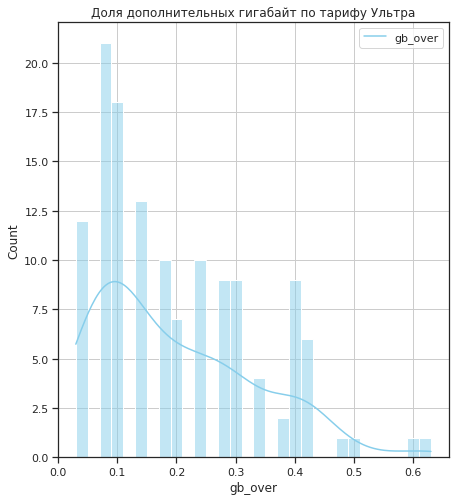

In [76]:
ax3 = sns.histplot(data=ultra_month.query('revenue > 1950'), x='gb_over', kde=True, bins=30, color='skyblue')
ax3.legend(labels=['gb_over'])
ax3.set_title(r'Доля дополнительных гигабайт по тарифу Ультра');

,share_overpay
count,148.000000
mean,0.069863
std,0.152814
min,0.000000
25%,0.000000
50%,0.000000
75%,0.021042
max,0.652500


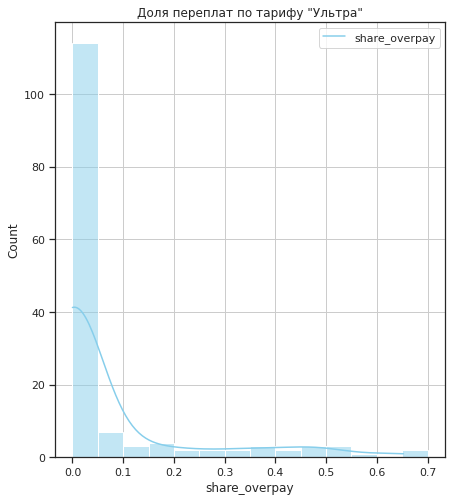

In [77]:
ultra_revenue = ultra_month.pivot_table(index='user_id', values='share_overpay')
ax3 = sns.histplot(data=ultra_revenue, x='share_overpay', kde=True, bins=30, binwidth=0.05, color='skyblue')
ax3.legend(labels=['share_overpay'])
ax3.set_title(r'Доля переплат по тарифу "Ультра"');
ultra_revenue.describe()

Доля выручки по среднему в тарифе Ультра составляет 0.05 по отношению к ежемесячной плате, они практически не доплачивают.

В тарифе Ультра дополнительные сообщения и минуты не используют. Гигабайты докупает в целом до 10% от основного количества в тарифе. Однако распределение плавное и доходит до 45%.

Дополнительная плата за услуги в большинстве случаев не превышает 5% от платы за тариф.

### Сколько требуется минут, сообщений и траффика пользователям в месяц

#### Распределение минут, сообщений, траффика  и выручки по месяцам

In [78]:
# Создаю сводную по месяцам с фильтром по тарифам
smart_month_pivot = (month_revenue.query('tariff == "smart"')
          .pivot_table(index='month', values=['duration', 'gb_month', 'mess_month', 'revenue'],
                aggfunc='mean')
         )
ultra_month_pivot = (month_revenue.query('tariff == "ultra"')
          .pivot_table(index='month', values=['duration', 'gb_month', 'mess_month', 'revenue'],
                aggfunc='mean')
         )

In [79]:
display(smart_month_pivot)
ultra_month_pivot

,duration,gb_month,mess_month,revenue
month,,,,
1,203.852941,8.735294,18.235294,721.323529
2,298.689655,11.844828,24.086207,827.603448
3,390.051948,15.233766,31.857143,1164.623377
4,367.133929,13.625000,30.741071,963.089286
5,387.361702,15.907801,33.773050,1197.510638
6,395.640244,15.951220,33.402439,1204.018293
7,408.353234,15.875622,33.751244,1223.950249
8,421.468085,16.736170,33.638298,1320.595745
9,428.611538,16.392308,33.638462,1249.946154


,duration,gb_month,mess_month,revenue
month,,,,
1,428.111111,13.222222,33.777778,1950.000000
2,297.125000,12.000000,21.958333,1975.000000
3,489.648649,17.648649,32.297297,2014.864865
4,458.018182,16.963636,31.563636,2001.818182
5,510.328358,19.373134,37.850746,2059.701493
6,479.702381,18.940476,41.726190,2039.285714
7,545.791209,20.505495,49.846154,2118.131868
8,510.775701,19.598131,48.439252,2083.177570
9,539.443478,19.243478,52.286957,2024.347826


In [80]:
# Смотрю сколько пользователей в каждом месяце по тарифам
print(month_revenue.query('tariff == "smart"')['month'].value_counts())
month_revenue.query('tariff == "ultra"')['month'].value_counts()

12    337
11    316
10    294
9     260
8     235
7     201
6     164
5     141
4     112
3      77
2      58
1      34
Name: month, dtype: int64


12    139
11    134
10    123
9     115
8     107
7      91
6      84
5      67
4      55
3      37
2      24
1       9
Name: month, dtype: int64

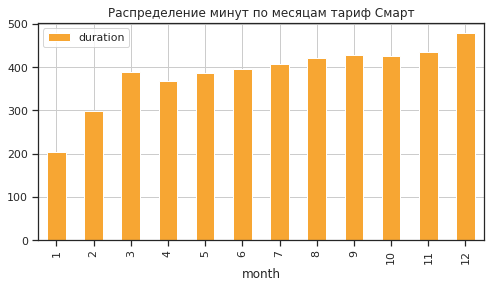

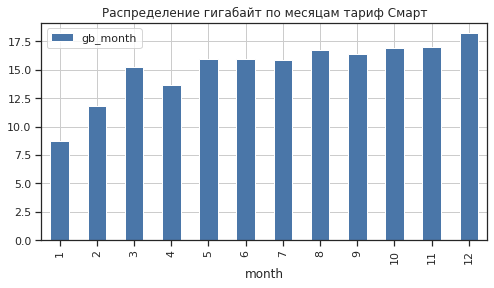

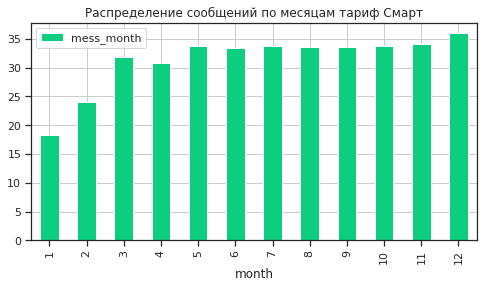

In [81]:
for col, x in {'duration' : ['#f7a633', 'Распределение минут по месяцам тариф Смарт'], 
               'gb_month' : ['#4a76a8', 'Распределение гигабайт по месяцам тариф Смарт'], 
               'mess_month' : ['#0dce7f', 'Распределение сообщений по месяцам тариф Смарт']}.items():
    smart_month_pivot.plot(y=col, color=x[0], kind='bar', legend=True, title=x[1], grid=True, figsize=(8, 4))

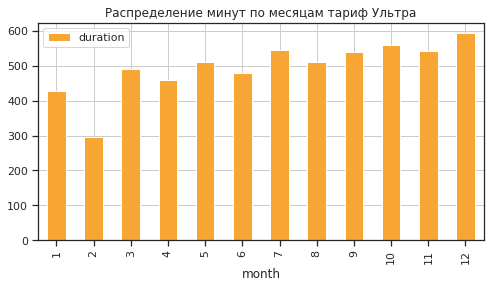

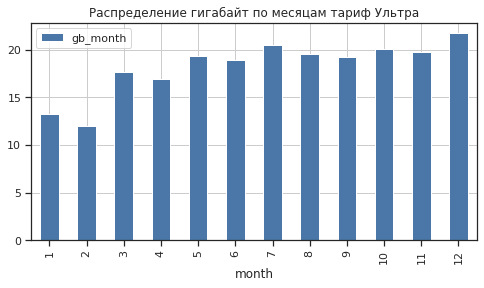

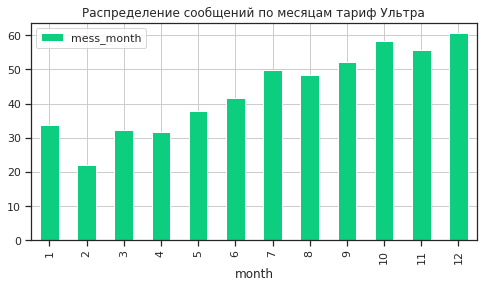

In [82]:
for col, x in {'duration' : ['#f7a633', 'Распределение минут по месяцам тариф Ультра'], 
               'gb_month' : ['#4a76a8', 'Распределение гигабайт по месяцам тариф Ультра'], 
               'mess_month' : ['#0dce7f', 'Распределение сообщений по месяцам тариф Ультра']}.items():
    ultra_month_pivot.plot(y=col, color=x[0], kind='bar', legend=True, title=x[1], grid=True, figsize=(8, 4))

Распределение по месяцам гигабайтов, минут и сообщений у тарифа Смарт практически равномерное, если брать медиану, за исключением двух первых месяцев. У ультра тарифа минуты и гигабайты  первые месяцы более подтянуты к остальным, зато в распределении сообщений есть явные просадка 3-6 месяцы. Клиенты тарифа ультра тратят больше гигабайт минут и сообщений, не считая 3 месяца. 

Можно сказать, что разница объема траффика между тарифами ультра и смарт не такая большая, как у сообщений и минут. Разница по медиане 3 гб. Возможно, из-за того, что пользователи тарифа смарт, часто выходят за границы включенных гигабайт и доплачивают отдельно.

#### Распределение минут, сообщений, траффика и выручки по клиентам

In [83]:
# Создаю сводную по пользователям, узнаю, сколько клиенты тратили в среднем за месяц
smart_user = (month_revenue.query('tariff == "smart"')
          .pivot_table(index='user_id', values=['duration', 'gb_month', 'mess_month', 'revenue'],
                aggfunc='mean')
               )

ultra_user = (month_revenue.query('tariff == "ultra"')
          .pivot_table(index='user_id', values=['duration', 'gb_month', 'mess_month', 'revenue'],
                aggfunc='mean')
               )

In [84]:
display(smart_user.head(10))
ultra_user.head(10)

,duration,gb_month,mess_month,revenue
user_id,,,,
1001,422.000000,16.000000,0.0,850.000000
1002,216.714286,16.714286,10.0,1035.714286
1005,550.416667,8.583333,46.0,827.000000
1006,318.272727,15.090909,0.0,931.818182
1007,486.555556,14.888889,25.0,913.444444
1008,339.000000,13.000000,56.0,568.000000
1009,218.900000,18.000000,11.0,1310.000000
1010,231.000000,16.800000,0.0,910.000000
1011,432.800000,18.700000,11.0,1514.400000


,duration,gb_month,mess_month,revenue
user_id,,,,
1000,320.750000,13.625000,62.000000,1950.0
1003,764.400000,11.800000,76.000000,1950.0
1004,123.375000,18.750000,149.000000,1950.0
1013,468.000000,15.500000,21.000000,1950.0
1016,61.000000,13.500000,71.000000,1950.0
1018,673.111111,7.333333,26.000000,1950.0
1019,352.166667,16.000000,18.333333,1950.0
1021,924.222222,19.333333,89.000000,1950.0
1024,724.666667,27.666667,0.000000,2900.0


In [85]:
display(smart_user.describe())
ultra_user.describe()

,duration,gb_month,mess_month,revenue
count,350.000000,350.000000,350.000000,350.000000
mean,419.634803,16.308519,32.352078,1324.401019
std,145.031543,3.501643,26.512448,606.040551
min,0.000000,5.727273,0.000000,550.000000
25%,316.886364,14.000000,11.000000,867.550000
50%,425.062500,16.333333,27.750000,1177.116667
75%,519.508333,18.691667,48.000000,1667.250000
max,891.500000,27.250000,118.000000,4333.333333


,duration,gb_month,mess_month,revenue
count,148.000000,148.000000,148.000000,148.000000
mean,527.821819,19.588446,54.030743,2086.464659
std,281.786359,8.116120,46.366246,298.532720
min,0.000000,0.000000,0.000000,1950.000000
25%,325.437500,14.727273,17.000000,1950.000000
50%,514.541667,18.775000,45.500000,1950.000000
75%,746.972222,25.687500,84.250000,1990.625000
max,1179.363636,38.500000,192.000000,3225.000000


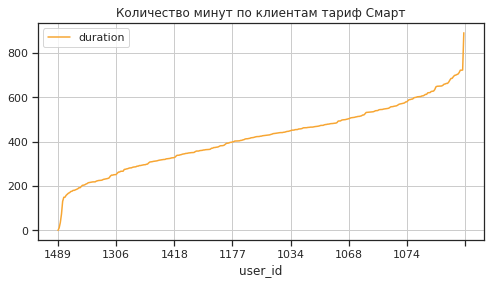

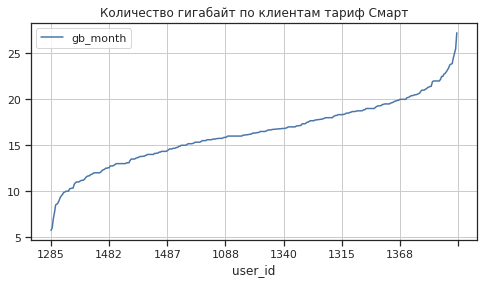

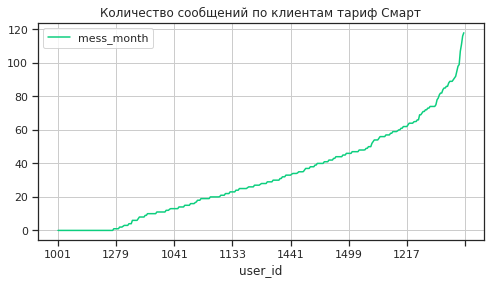

In [86]:
for col, x in {'duration' : ['#f7a633', 'Количество минут по клиентам тариф Смарт'], 
               'gb_month' : ['#4a76a8', 'Количество гигабайт по клиентам тариф Смарт'], 
               'mess_month' : ['#0dce7f', 'Количество сообщений по клиентам тариф Смарт']}.items():
    smart_user.sort_values(by=[col]).plot(y=col, color=x[0], kind='line', legend=True, title=x[1], grid=True, figsize=(8, 4))

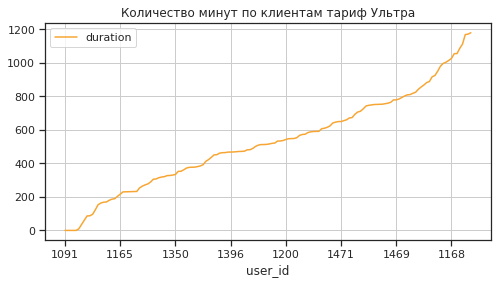

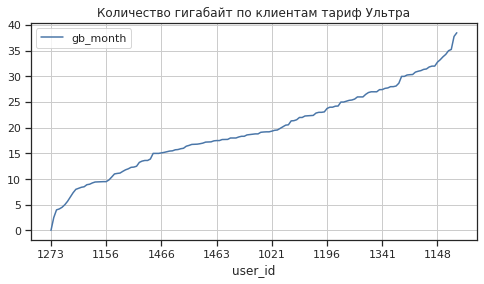

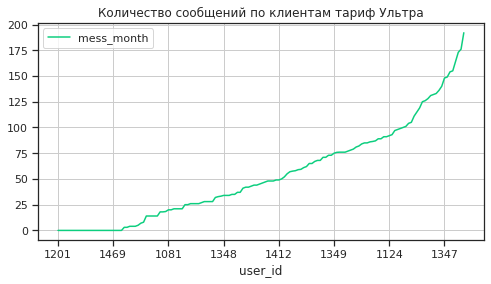

In [87]:
for col, x in {'duration' : ['#f7a633', 'Количество минут по клиентам тариф Ультра'], 
               'gb_month' : ['#4a76a8', 'Количество гигабайт по клиентам тариф Ультра'], 
               'mess_month' : ['#0dce7f', 'Количество сообщений по клиентам тариф Ультра']}.items():
    ultra_user.sort_values(by=[col]).plot(y=col, color=x[0], kind='line', legend=True, title=x[1], grid=True, figsize=(8, 4))

Пользователи тарифа смарт тратят в среднем больше гигабайт, чем положено в рамках траффика, минуты и сообщения в рамках тарифа. Учитывая, что дополнительный 1 гб - 200 рублей. Пользователи тарифа смарт серьезно переплачивают.

### Поведение клиентов относительно городов

In [88]:
month_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        3214 non-null   object 
 1   month          3214 non-null   int64  
 2   calls_count    3214 non-null   float64
 3   duration       3214 non-null   float64
 4   gb_month       3214 non-null   float64
 5   mess_month     3214 non-null   float64
 6   tariff         3214 non-null   object 
 7   revenue        3214 non-null   float64
 8   share_overpay  3214 non-null   float64
 9   gb_over        3214 non-null   float64
 10  mess_over      3214 non-null   float64
 11  duration_over  3214 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 326.4+ KB


In [89]:
# Создаю временную переменную без лишней информации для слияния дальше
local = users.drop(['age', 'churn_date', 'first_name', 'last_name', 'reg_date'], axis=1)
# Создаю переменную с клиентами по городам
user_local = month_revenue.pivot_table(index='user_id', values=['revenue', 'duration', 'gb_month', 'mess_month', 'tariff', 'share_overpay', 'gb_over', 'mess_over', 'duration_over']).reset_index()
user_local = user_local.merge(local, on='user_id')
user_local.info()
user_local.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 497
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        498 non-null    object 
 1   duration       498 non-null    float64
 2   duration_over  498 non-null    float64
 3   gb_month       498 non-null    float64
 4   gb_over        498 non-null    float64
 5   mess_month     498 non-null    float64
 6   mess_over      498 non-null    float64
 7   revenue        498 non-null    float64
 8   share_overpay  498 non-null    float64
 9   city           498 non-null    object 
 10  tariff         498 non-null    object 
dtypes: float64(8), object(3)
memory usage: 46.7+ KB


,user_id,duration,duration_over,gb_month,gb_over,mess_month,mess_over,revenue,share_overpay,city,tariff
0,1000,320.750000,0.0,13.625000,0.000000,62.0,0.0,1950.000000,0.000000,Краснодар,ultra
1,1001,422.000000,0.0,16.000000,0.100000,0.0,0.0,850.000000,0.545000,Москва,smart
2,1002,216.714286,0.0,16.714286,0.161429,10.0,0.0,1035.714286,0.882857,Стерлитамак,smart
3,1003,764.400000,0.0,11.800000,0.000000,76.0,0.0,1950.000000,0.000000,Москва,ultra
4,1004,123.375000,0.0,18.750000,0.000000,149.0,0.0,1950.000000,0.000000,Новокузнецк,ultra


In [90]:
user_local.query('tariff == "ultra" and city == "Москва"')['tariff'].count()

32

Доля клиентов с тарифом Ультра в Москве - 32.3%, 67.7% используют тариф Смарт.

In [91]:
city_pivot = user_local.pivot_table(index='city', values=['revenue', 'share_overpay', 'gb_over', 'duration_over', 'mess_over'])

,duration_over,gb_over,mess_over,revenue,share_overpay
city,,,,,
Якутск,0.053333,0.376889,0.000000,1756.666667,2.193889
Хабаровск,0.113750,0.336250,0.062500,1738.333333,2.160417
Липецк,0.028400,0.327500,0.200000,1602.600000,1.915000
Ижевск,0.154111,0.261190,0.115556,1582.626984,1.879603
Чита,0.087958,0.291042,0.002917,1557.375000,1.830625


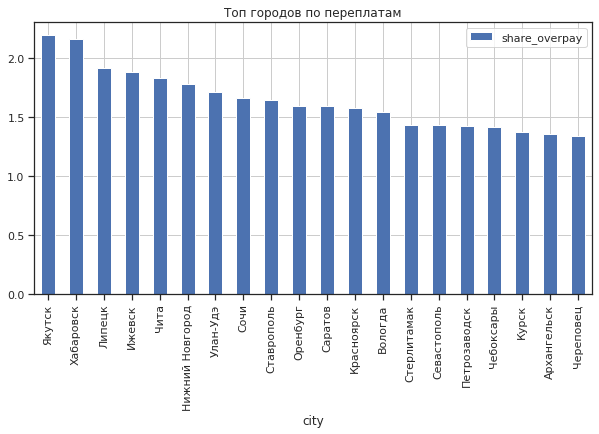

In [92]:
(city_pivot.query('share_overpay > 1.34').sort_values(by='share_overpay', ascending=False)
 .plot(y='share_overpay', kind='bar', legend=True, title='Топ городов по переплатам', figsize=(10, 5))
)
city_pivot.sort_values(by='share_overpay', ascending=False).head()

,duration_over,gb_over,mess_over,revenue,share_overpay
city,,,,,
Воронеж,0.037542,0.112443,0.000000,2169.096591,0.593542
Красноярск,0.103548,0.261078,0.026905,2156.636054,1.578871
Оренбург,0.054250,0.258750,0.140000,2127.375000,1.595000
Нижний Новгород,0.138816,0.254934,0.083333,2067.251736,1.778486
Саранск,0.034045,0.205909,0.330000,2049.005682,1.128977
Брянск,0.000000,0.020833,0.000000,2043.750000,0.047917
Иваново,0.000000,0.000000,0.000000,1950.000000,0.000000
Нижневартовск,0.000000,0.000000,0.000000,1950.000000,0.000000
Сургут,0.000000,0.000000,0.000000,1950.000000,0.000000


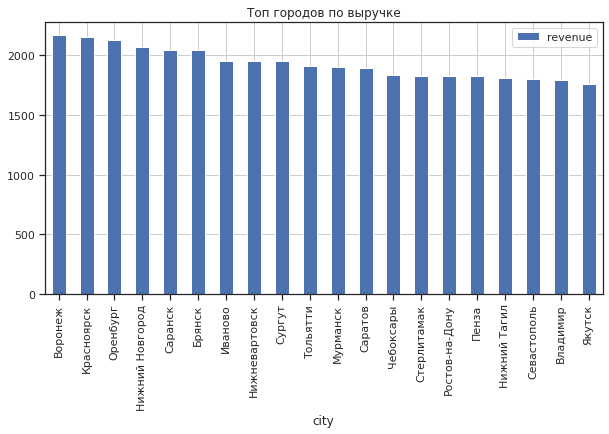

In [93]:
(city_pivot.query('revenue > 1756').sort_values(by='revenue', ascending=False)
 .plot(y='revenue', kind='bar', legend=True,title='Топ городов по выручке', figsize=(10, 5))
)
city_pivot.sort_values(by='revenue', ascending=False).head(20)

В топах по выручке и переплатах нет Москвы и Петербурга. 

### Среднее, дисперсия и стандартное отклонение

In [94]:
smart_user[['duration','gb_month','mess_month','revenue']].agg(['mean','std','var'])

,duration,gb_month,mess_month,revenue
mean,419.634803,16.308519,32.352078,1324.401019
std,145.031543,3.501643,26.512448,606.040551
var,21034.148607,12.261503,702.909910,367285.150014


In [95]:
smart_month_pivot.describe()

,duration,gb_month,mess_month,revenue
count,12.000000,12.000000,12.000000,12.000000
mean,386.760499,15.198728,31.413211,1179.924424
std,72.262004,2.626973,5.103413,239.110337
min,203.852941,8.735294,18.235294,721.323529
25%,382.304759,14.831575,31.578125,1114.239854
50%,401.996739,15.929510,33.638380,1213.984271
75%,426.754925,16.772366,33.767242,1326.208676
max,478.560831,18.201780,35.994065,1578.531157


In [96]:
ultra_month_pivot.describe()

,duration,gb_month,mess_month,revenue
count,12.000000,12.000000,12.000000,12.000000
mean,495.934310,18.258937,43.714983,2046.932856
std,77.450072,2.921533,12.320470,56.889858
min,297.125000,12.000000,21.958333,1950.000000
25%,474.281331,17.477396,33.407658,2011.603194
50%,510.552030,19.308306,45.082721,2049.493603
75%,542.483250,19.870738,53.162979,2085.424222
max,592.805755,21.741007,60.611511,2138.848921


## Проверка гипотез

### Средняя выручка пользователей тарифов различаются

#### Проверка распределения на нормальность

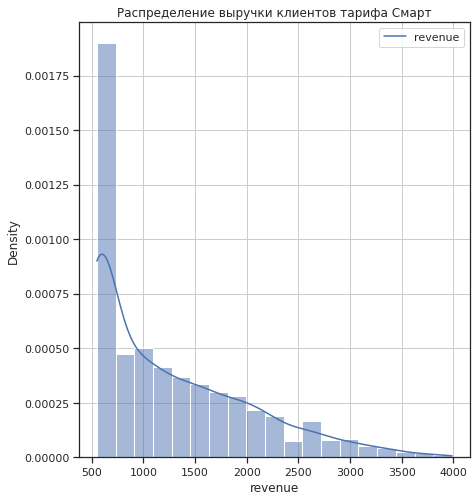

In [97]:
ax3 = sns.histplot(filter_smart['revenue'], kde=True, stat='density');
ax3.legend(labels=['revenue'])
ax3.set_title(r'Распределение выручки клиентов тарифа Смарт');

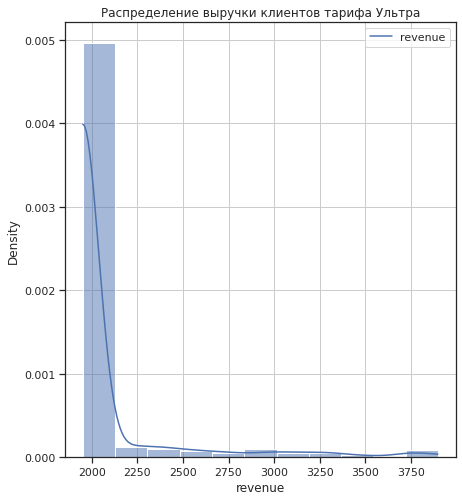

In [98]:
ax3 = sns.histplot(filter_ultra['revenue'], kde=True, stat='density');
ax3.legend(labels=['revenue'])
ax3.set_title(r'Распределение выручки клиентов тарифа Ультра');

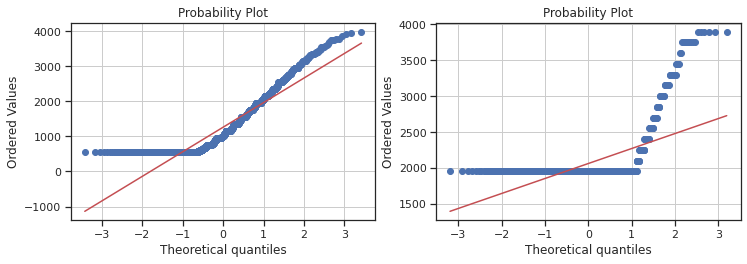

In [99]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
st.probplot(filter_smart['revenue'], dist="norm", plot=plt)
plt.subplot(2,2,2)
st.probplot(filter_ultra['revenue'], dist="norm", plot=plt)
plt.show()

Распределения не нормальные. Критерий студьюдента здесь не очень применим, тем не менее сформулируем гипотезу.

#### Проверка гипотезы тестом Стьюдента

Нулевая гипотеза: средние выручки пользователей в тарифах Ультра и Смарт одинаковы.

Альтернативная гипотеза: средние выручки пользователей в тарифах Ультра и Смарт различны.

Уровень значимости: alpha = 0.05. Я выбираю такое значение alpha, так как считаю, что в данном исследование последствия ошибки первого рода не критичны.

In [100]:
results = st.ttest_ind(filter_smart['revenue'], filter_ultra['revenue'])

alpha = 0.05
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  4.836973199793395e-193
Отвергаем нулевую гипотезу


Теперь попробуем односторонюю проверку гипотезы.

Нулевая гипотеза: средние выручки пользователей в тарифах Ультра и Смарт одинаковы.

Альтернативная гипотеза: средняя выручка тарифа Ультра больше тарифа Смарт.

In [101]:
results = st.ttest_ind(filter_ultra['revenue'], filter_smart['revenue'], alternative='greater')

alpha = 0.05
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  2.4184865998966976e-193
Отвергаем нулевую гипотезу


In [102]:
filter_ultra['revenue'].mean()

2060.5504587155965

In [103]:
filter_smart['revenue'].mean()

1261.018091361375

Если учесть, что распределение нормальное, то по тесту Стьюдента получается, что мы должны принять гипотезу: средняя выручка тарифа Ультра больше тарифа Смарт. P-value намного меньше alpha, значит, вряд ли это случайность. Однако полностью доверять тесту Стьюдента мы не можем, так как распределение не нормально. Попробую тест Манна-Уитни, так как он непараметрический и не зависит от распределения.

#### Проверка гипотезы тестом Манна-Уитни

Нулевая гипотеза: средние выручки пользователей в тарифах Ультра и Смарт одинаковы.

Альтернативная гипотеза: средние выручки пользователей в тарифах Ультра и Смарт различны.

In [104]:
results = st.mannwhitneyu(filter_smart['revenue'], filter_ultra['revenue'], alternative='two-sided')

alpha = 0.05
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.6594475007028876e-193
Отвергаем нулевую гипотезу


In [105]:
results = st.mannwhitneyu(filter_ultra['revenue'], filter_smart['revenue'], alternative='greater')
alpha = 0.05
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  8.297237503514438e-194
Отвергаем нулевую гипотезу


Все подтвердилось, похоже пользователи тарифа Ультра приносят больше выручки, однако p-value отличаются между тестами. Для более надежного и корректного результата будем  далее использовать тест Манни-Уитни.

### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

#### Проверка распределения на нормальность

In [106]:
users_moscow = pd.merge(month_revenue, users[['user_id', 'city']], on='user_id', how='inner').query('city == "Москва"')
users_cities = pd.merge(month_revenue, users[['user_id', 'city']], on='user_id', how='inner').query('city != "Москва"')

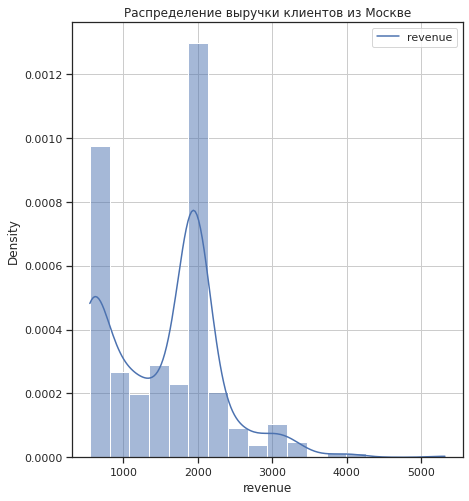

In [107]:
ax3 = sns.histplot(users_moscow['revenue'], kde=True, stat='density');
ax3.legend(labels=['revenue'])
ax3.set_title(r'Распределение выручки клиентов из Москве');

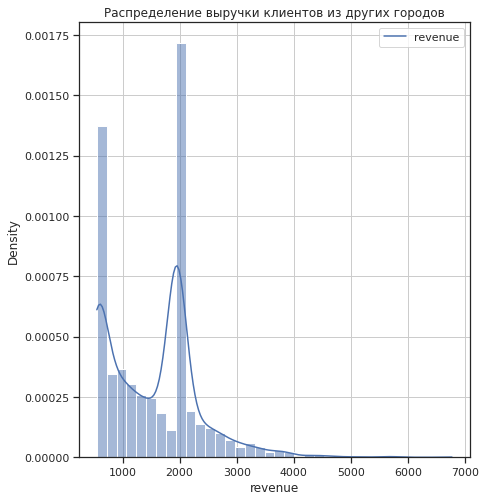

In [108]:
ax3 = sns.histplot(users_cities['revenue'], kde=True, stat='density');
ax3.legend(labels=['revenue'])
ax3.set_title(r'Распределение выручки клиентов из других городов');

Отфильтруем выбросы в таблицах.

In [109]:
users_moscow = users_moscow.query('revenue < 3250')
users_moscow.shape

(600, 13)

In [110]:
users_cities = users_cities.query('revenue < 3250')
users_cities.shape

(2524, 13)

Распределения не нормального характера. Применим тест Манна-Уитни.

#### Проверка гипотезы

Нулевая гипотеза: средние выручки пользователей из Москвы и пользователей из других регионов одинаковы.

Альтернативная гипотеза: средние выручки пользователей из Москвы и пользователей из других регионов отличаются.

In [111]:
results = st.mannwhitneyu(users_moscow['revenue'], users_cities['revenue'], alternative='two-sided')

alpha = 0.05
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.15260829582411192
Не получилось отвергнуть нулевую гипотезу


In [112]:
users_moscow['revenue'].mean()

1506.3983333333333

In [113]:
users_cities['revenue'].mean()

1451.63470681458

С вероятностью 15% разница между данными средними из выборок случайна. Нельзя точно сказать, что одно среднее больше или  меньше другого. Следовательно, не можем отвергнуть нулевую гипотезу.

### Средние переплаты у пользователей тарифов отличны

#### Проверка распределения на нормальность

In [114]:
overpay_smart = month_revenue.query('tariff == "smart"').reset_index(drop=True)
overpay_smart['rub_overpay'] = overpay_smart['share_overpay'] * overpay_smart['revenue']
overpay_smart.head(10)

,user_id,month,calls_count,duration,gb_month,mess_month,tariff,revenue,share_overpay,gb_over,mess_over,duration_over,rub_overpay
0,1001,11,59.0,430.0,18.0,0.0,smart,1150.0,1.09,0.20,0.0,0.0,1253.5
1,1001,12,63.0,414.0,14.0,0.0,smart,550.0,0.00,0.00,0.0,0.0,0.0
2,1002,6,15.0,117.0,11.0,4.0,smart,550.0,0.00,0.00,0.0,0.0,0.0
3,1002,7,26.0,214.0,18.0,11.0,smart,1150.0,1.09,0.20,0.0,0.0,1253.5
4,1002,8,42.0,289.0,20.0,13.0,smart,1550.0,1.82,0.33,0.0,0.0,2821.0
5,1002,9,36.0,206.0,17.0,4.0,smart,950.0,0.73,0.13,0.0,0.0,693.5
6,1002,10,33.0,212.0,14.0,10.0,smart,550.0,0.00,0.00,0.0,0.0,0.0
7,1002,11,32.0,243.0,19.0,16.0,smart,1350.0,1.45,0.27,0.0,0.0,1957.5
8,1002,12,33.0,236.0,18.0,12.0,smart,1150.0,1.09,0.20,0.0,0.0,1253.5
9,1005,1,15.0,95.0,3.0,7.0,smart,550.0,0.00,0.00,0.0,0.0,0.0


In [115]:
overpay_ultra = month_revenue.query('tariff == "ultra"').reset_index(drop=True)
overpay_ultra['rub_overpay'] = overpay_ultra['share_overpay'] * overpay_ultra['revenue']
overpay_ultra.head(10)

,user_id,month,calls_count,duration,gb_month,mess_month,tariff,revenue,share_overpay,gb_over,mess_over,duration_over,rub_overpay
0,1000,5,22.0,159.0,3.0,22.0,ultra,1950.0,0.0,0.0,0.0,0.0,0.0
1,1000,6,43.0,172.0,23.0,60.0,ultra,1950.0,0.0,0.0,0.0,0.0,0.0
2,1000,7,47.0,340.0,14.0,75.0,ultra,1950.0,0.0,0.0,0.0,0.0,0.0
3,1000,8,52.0,408.0,14.0,81.0,ultra,1950.0,0.0,0.0,0.0,0.0,0.0
4,1000,9,58.0,466.0,15.0,57.0,ultra,1950.0,0.0,0.0,0.0,0.0,0.0
5,1000,10,57.0,350.0,15.0,73.0,ultra,1950.0,0.0,0.0,0.0,0.0,0.0
6,1000,11,43.0,338.0,15.0,58.0,ultra,1950.0,0.0,0.0,0.0,0.0,0.0
7,1000,12,46.0,333.0,10.0,70.0,ultra,1950.0,0.0,0.0,0.0,0.0,0.0
8,1003,8,55.0,380.0,9.0,37.0,ultra,1950.0,0.0,0.0,0.0,0.0,0.0
9,1003,9,134.0,961.0,13.0,91.0,ultra,1950.0,0.0,0.0,0.0,0.0,0.0


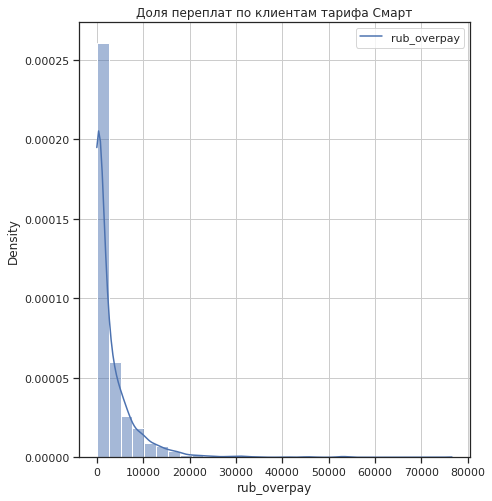

In [116]:
ax3 = sns.histplot(overpay_smart['rub_overpay'], kde=True, bins=30, stat='density');
ax3.legend(labels=['rub_overpay'])
ax3.set_title(r'Доля переплат по клиентам тарифа Смарт');

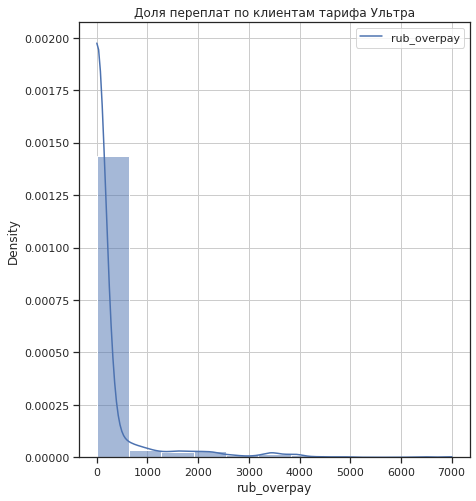

In [117]:
ax3 = sns.histplot(overpay_ultra['rub_overpay'], kde=True, stat='density');
ax3.legend(labels=['rub_overpay'])
ax3.set_title(r'Доля переплат по клиентам тарифа Ультра');

In [118]:
filter_overpay_smart = overpay_smart.query('rub_overpay < 18000')
filter_overpay_ultra = overpay_ultra.query('rub_overpay < 2500')

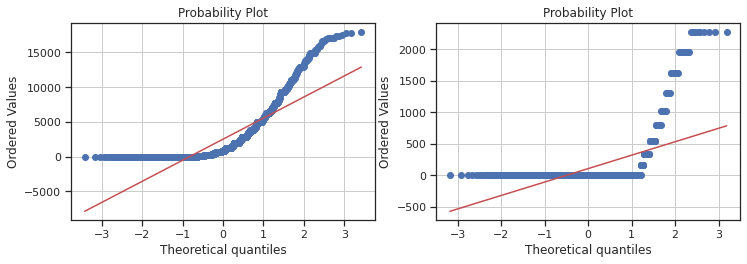

In [119]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
st.probplot(filter_overpay_smart['rub_overpay'], dist="norm", plot=plt)
plt.subplot(2,2,2)
st.probplot(filter_overpay_ultra['rub_overpay'], dist="norm", plot=plt)
plt.show()

#### Проверка гипотез

**Нулевая гипотеза:** средние переплаты у пользователей тарифов Ультра и Смарт одинаковы.

**Альтернативная гипотеза:** средние переплаты у пользователей тарифов Ультра и Смарт отличны.


In [120]:
results = st.mannwhitneyu(filter_overpay_smart['rub_overpay'], filter_overpay_ultra['rub_overpay'], alternative='two-sided')

alpha = 0.05
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.4465094367499983e-210
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу и делаем односторонню проверку.

**Нулевая гипотеза:** средние переплаты у пользователей тарифов Ультра и Смарт одинаковы.

**Альтернативная гипотеза:** средние переплаты у пользователей тарифов Ультра и Смарт отличны.

In [121]:
results = st.mannwhitneyu(filter_overpay_smart['rub_overpay'], filter_overpay_ultra['rub_overpay'], alternative='greater')

alpha = 0.05
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  7.232547183749992e-211
Отвергаем нулевую гипотезу


In [122]:
filter_overpay_smart['rub_overpay'].mean()

2493.483496120493

In [123]:
filter_overpay_ultra['rub_overpay'].mean()

107.315625

Даже в абсолютном значении клиенты тарифа Смарт переплачивают за дополнительные гигабайты, минуты и сообщения больше, чем клиенты тарифа Ультра. Очевидно то же будет и по долям.

Скорее всего, в генеральной совокупности пользователи тарифа Смарт переплачивают, вероятность, что это случайность очень мала.

## Общий вывод

С помощью непараметрического теста Манна-Уитни мы определили, что тариф "Ультра" приносит больший доход, чем "Смарт". Стоит продвигать его в рекламе. 

Траты клиентов из Москвы не отличаются от трат клиенты из других городов. Более того Москва не входит в даже в топ 20 городов по выручки и топ 20 городов по использованию дополнительных минут, гигабайт и сообщений. Москвичи разумно подбирают тариф, держатся в его рамках.

Доля переплат по тарифу "Смарт" превышает долю переплат по тарифу "Ультра". Я принял альтернативную гипотезу, исходя из теста Манна-Уитни и исследовательского анализа данных. Средняя доля переплат составляет 138%. С одной стороны, прибыль это хорошо, с другой доля переплат настолько большая, что может привести к уходу клиентов к другим более лояльным операторам связи. Возможно, стоит задуматься о третьем тарифе с пределом в 20 гб, так как клиенты в основном докупают траффик и на гистограмме потраченных гигабайт был явный пик на 20 гб., то есть много клиентов тратят 20 гб. в месяц. 